In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt

D:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('employee_churn_data.csv')

In [ ]:
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


Taking a closer look at the dataset with help of "head()" function of pandas library which returns first five observations.

In [ ]:
df.shape

(9540, 10)

To find and understand the total rows and columns of the dataset. This shows that the dataset has 9450 rows, and 10 columns.

This means there are a total of 9540 employees in this dataset

In [ ]:
for i in df.columns:
    print(f"Unique {i}'s count: {df[i].nunique()}")
    print(f"{df[i].unique()}\n")

Unique department's count: 10
['operations' 'support' 'logistics' 'sales' 'IT' 'admin' 'engineering'
 'marketing' 'finance' 'retail']

Unique promoted's count: 2
[0 1]

Unique review's count: 9540
[0.57756866 0.75189966 0.72254845 ... 0.55797965 0.58444574 0.62637329]

Unique projects's count: 4
[3 4 2 5]

Unique salary's count: 3
['low' 'medium' 'high']

Unique tenure's count: 11
[ 5.  6.  8.  7.  4.  3.  2.  9. 10. 11. 12.]

Unique satisfaction's count: 9540
[0.62675897 0.44367895 0.44682322 ... 0.70542476 0.60728698 0.70645479]

Unique bonus's count: 2
[0 1]

Unique avg_hrs_month's count: 9540
[180.86606967 182.70814896 184.41608404 ... 186.53100819 187.64136977
 185.92093423]

Unique left's count: 2
['no' 'yes']



To get a better and deeper understanding of all the features in the dataset

### Now we have a deeper understanding of all attributes:

1. Departments (There are a total of 10 different departments including Operations, Support, Logistics, Sales, IT, Admin, Engineering, Marketing, Finance and Retail)

2. Promoted (There are 2 different values in Promoted column 0 and 1 which indicates whether employee has received a promotion or not)

3. Review (This is the numerical value which indicates the composite score the employee received in the last evaluation)

4. Project (This indicates the number of different projects the employee is currently involved in. This can include 2, 3, 4 or 5)

5. Salary (This column indicates the salary paid to the employees. It includes 3 tiers of salaries including low, medium, and high)

6. Tenure (This column indicates the total time the employee has been at the company. It can range from 2 years to a total of 12 years)

7. Satisfaction (This column is a satisfaction score which is employees satisfaction level from the surveys)

8. Bonus (This column indicates whether the employee has received any bonus or not indicated by 'yes' or 'no')

9. Avg_Hours_Month (This column indicates the total monthly hours of the employee in the company)

10. Left (This column indicates whether the employee has left the company or still exists in the company)

---------------
Further analyzing the 'left' column from the dataset to see how many employees left

In [ ]:
df['left'].value_counts()

no     6756
yes    2784
Name: left, dtype: int64

From the dataset we can see that **2784** employees have left the company out of approximately 9000 total employees indicating a very high turnover rate.

We will calculate the employee turnover rate in the next few steps after analyzing the total employees left


## Data Analysis & Visualizing the Employees turnover

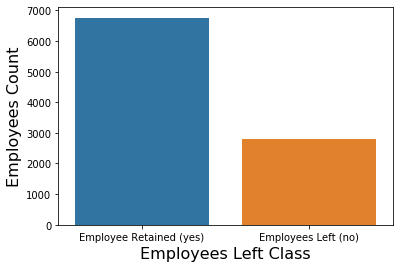

In [ ]:
g = sns.countplot(df['left'])
plt.xlabel('Employees Left Class', fontsize=16)
plt.ylabel('Employees Count', fontsize=16)
g.set_xticklabels(['Employee Retained (yes)','Employees Left (no)'])
plt.show()

We can clearly see that approximately ~3000 employees have left the company and around ~6700 employees have stayed in the company.

### Calculating Employee Turnover Rate

In [ ]:
emp_turnover = df['left'].value_counts()[1] / df.shape[0] * 100
print('The employee turnover rate is ', emp_turnover, '%')

The employee turnover rate is  29.18238993710692 %


**The employee turnover rate is ~29% which is very high and needs to be reduced immediately by the company**

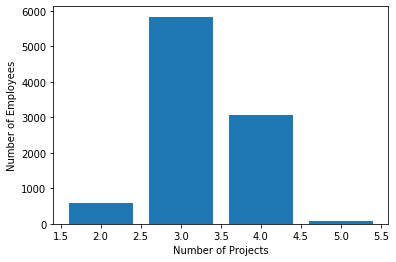

In [ ]:
num_projects=df.groupby('projects').count()
plt.bar(num_projects.index.values, num_projects['satisfaction'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

**We can see from the bargraph that most of the employees are engaged in 3 projects at a time and very few employees are engaged in 5 projects simultaneously**

Lets visualize each attribute in the dataset with the help of a bargraph to understand the dataset in much more detail

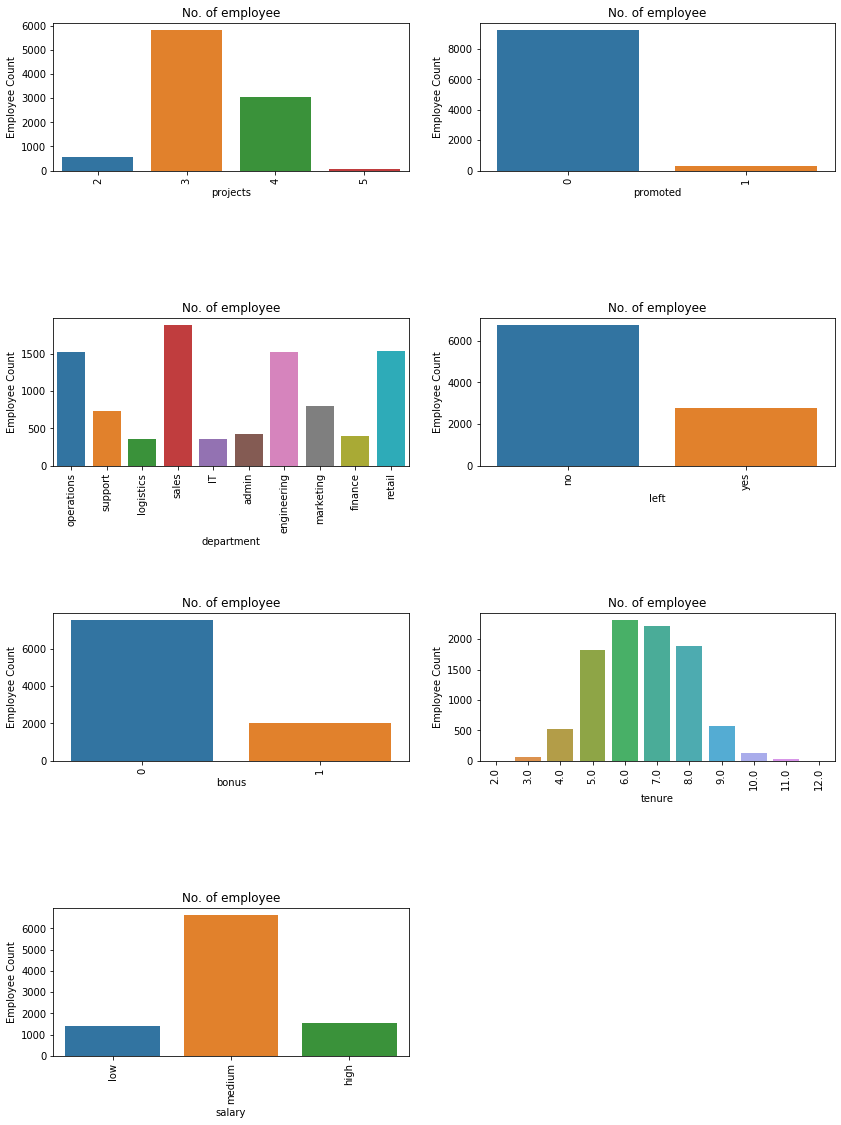

In [ ]:
features=['projects', 'promoted','department','left', 'bonus','tenure','salary']
fig=plt.subplots(figsize=(14,19))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j, data = df)
    plt.ylabel('Employee Count', fontsize=10)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

### Following observations can be noted from the above Data Visualizations:

- Majority of the employees are busy with 3 projects and very few employees are involved in 5 projects at a time
- Very few employees have received promotion in the last 2 years. The average promotion rate of employees is approximately 3%
- The Sales department is having maximum number of employees while IT department has the least number of employees
- The employee turnover rate is approximately 29.1% which is very high.
- Roughly 30% of the employees have received bonus
- Most of the employees have spent a tenure of 6 years
- The maximum tenure served by employees is 12 years and minimum tenure served by employee is 2 years
- Most of the employees are earning a medium salary and very few employees are earning low and high salary    

In [ ]:
df['promoted'].value_counts()[1]/df.shape[0] * 100

3.0293501048218032

The average promotion rate of employees is approximately 3.02%

------------

Further analyzing the department column using describe() function to understand each department in more detail

In [ ]:
df['department'].describe()

count      9540
unique       10
top       sales
freq       1883
Name: department, dtype: object

In [ ]:
df['department'].value_counts()

sales          1883
retail         1541
operations     1522
engineering    1516
marketing       802
support         735
admin           423
finance         402
logistics       360
IT              356
Name: department, dtype: int64

Further verified that Sales is the top department with most employees and IT is the department with least employees

## Research Question 1 (Which department has the highest employee turnover? Which one has the lowest?)

In [ ]:
df['department'].unique()

array(['operations', 'support', 'logistics', 'sales', 'IT', 'admin',
       'engineering', 'marketing', 'finance', 'retail'], dtype=object)

We have a total of 10 different departments in this dataset. Let's see which department has the highest employee turnover and which department has the lowest

In [ ]:
print(df[df['department']=='admin']['left'].value_counts())
df[df['department']=='admin']['left'].value_counts()[1]/df[df['department']=='admin']['left'].value_counts()[0]

no     304
yes    119
Name: left, dtype: int64


0.39144736842105265

Employee turnover rate for Admin department is *39.1%*

In [ ]:
print(df[df['department']=='sales']['left'].value_counts())
df[df['department']=='sales']['left'].value_counts()[1]/df[df['department']=='sales']['left'].value_counts()[0]

no     1346
yes     537
Name: left, dtype: int64


0.39895988112927194

Employee turnover rate for Sales deparment is *39.8%*

In [ ]:
print(df[df['department']=='logistics']['left'].value_counts())
df[df['department']=='logistics']['left'].value_counts()[1]/df[df['department']=='logistics']['left'].value_counts()[0]

no     249
yes    111
Name: left, dtype: int64


0.4457831325301205

Employee turnover rate for Logistics department is *44.5%*

In [ ]:
print(df[df['department']=='support']['left'].value_counts())
df[df['department']=='support']['left'].value_counts()[1]/df[df['department']=='support']['left'].value_counts()[0]

no     523
yes    212
Name: left, dtype: int64


0.40535372848948376

Employee turnover rate for Support department is *40.5%*

In [ ]:
print(df[df['department']=='IT']['left'].value_counts())
df[df['department']=='IT']['left'].value_counts()[1]/df[df['department']=='IT']['left'].value_counts()[0]

0.44715447154471544

**Highest employee turnover rate is 44.7% in the department of IT**

In [ ]:
print(df[df['department']=='operations']['left'].value_counts())
df[df['department']=='operations']['left'].value_counts()[1]/df[df['department']=='operations']['left'].value_counts()[0]

no     1086
yes     436
Name: left, dtype: int64


0.4014732965009208

Operation department's employee turnover rate is *40.1%*

In [ ]:
print(df[df['department']=='retail']['left'].value_counts())

df[df['department']=='retail']['left'].value_counts()[1]/ df[df['department']=='retail']['left'].value_counts()[0]

no     1070
yes     471
Name: left, dtype: int64


0.44018691588785047

Retail departmnt has an employee turnover rate of *44.0%*

In [ ]:
print(df[df['department']=='marketing']['left'].value_counts())

df[df['department']=='marketing']['left'].value_counts()[1]/df[df['department']=='marketing']['left'].value_counts()[0]

no     559
yes    243
Name: left, dtype: int64


0.4347048300536673

Marketing department has an employee turnover rate of *43.4%*

In [ ]:
print(df[df['department']=='engineering']['left'].value_counts())

df[df['department']=='engineering']['left'].value_counts()[1]/df[df['department']=='engineering']['left'].value_counts()[0]

no     1079
yes     437
Name: left, dtype: int64


0.40500463392029656

Engineering department has an employee turnover rate of *40.5%*

In [ ]:
print(df[df['department']=='finance']['left'].value_counts())

df[df['department']=='finance']['left'].value_counts()[1] / df[df['department']=='finance']['left'].value_counts()[0]

no     294
yes    108
Name: left, dtype: int64


0.3673469387755102

**Lowest employee turnover rate is 36.7% in Finance department**

### Hence we can finally conclude that the lowest employee turnover rate is in *Finance* department while the highest employee turnover rate is in *IT* department**


The company needs to pay immediate attention towards the IT department otherwise it can have a negative impact on the overall business.

Moreover, the company must follow similar practices of Finance department across all the departments to maintain maximum employee turnover rate

## Research Question 2 (Investigate which variables seem to be better predictors of employee departure)

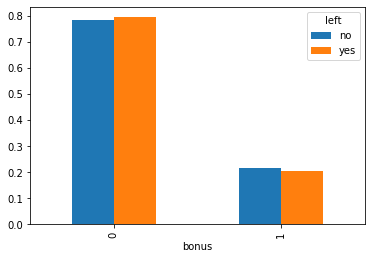

In [ ]:
pd.crosstab(df["bonus"], df["left"],normalize="columns").plot(kind="bar");

**Employees with no bonuses are more likely to leave the company over those employees who are earning bonuses**

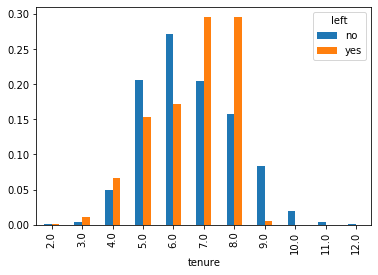

In [ ]:
pd.crosstab(df["tenure"], df["left"],normalize="columns").plot(kind="bar");

**Employees after 8 years of working tenure are less likely to turnover. Try to retain employees till at least 8 years by giving them bonuses or other perks for maximum employee retention**

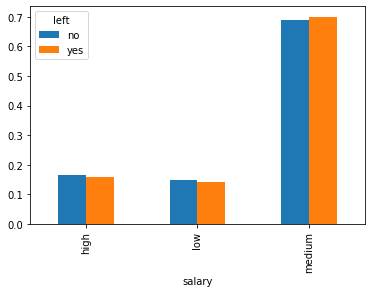

In [ ]:
pd.crosstab(df["salary"], df["left"],normalize="columns").plot(kind="bar");

**Employees with a medium salary are more likely to leave the company as compared to employees with high or low salary**

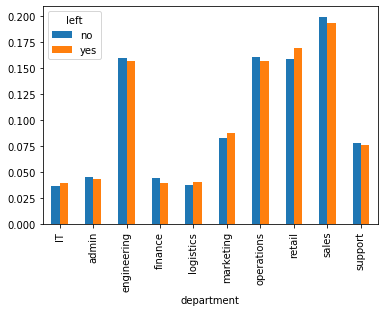

In [ ]:
pd.crosstab(df["department"], df["left"],normalize="columns").plot(kind="bar");

**We can clearly see from the bargraph that employees in IT, Logistics, Marketing, and Retail department are more likely to leave the company as compared to other departments**

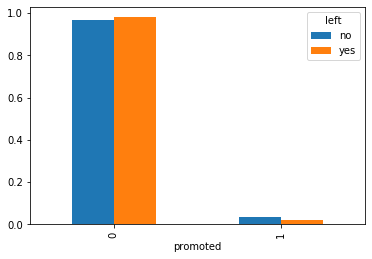

In [ ]:
pd.crosstab(df["promoted"], df["left"],normalize="columns").plot(kind="bar");

**From the bargraph it is evident that Employees who have not received a Promotion in the last 2 years are more likely to leave the company**

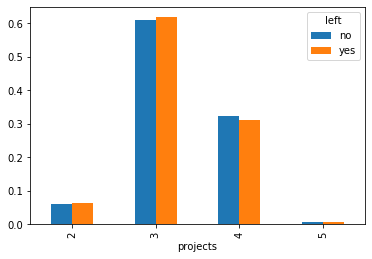

In [ ]:
pd.crosstab(df["projects"], df["left"],normalize="columns").plot(kind="bar");

**We can clearly see that employees engaged in 2 and 3 projects are more likely to leave the company due to less responsiblity in the company while employees engaged in more than 3 projects are less likely to leave the company**

### Following variables seemed to be better predictor of employees departure from the above Data Visualization:

- bonus
- tenure
- salary
- department
- promoted
- projects

### Research Question 3 (What recommendations would you make regarding ways to reduce employee turnover?)

1. The company can give bonuses to the employees based on their performance to appreciate and reduce employee turnover.
2. The company should also increase the salary of employees to better retain them. This is one of the most important factor in reducing employee turnover rate.
3. Company must change their compensation and benefits plan and replicate similar policies which are followed in the Finance department to reduce employee turnover rate.
4. It is very important for the company to improve the policies, offer additional benefits and deeply inspect the IT department which has the highest employee turnover rate.
5. The company can also offer flexible working hours and remote working to the employees of IT department for better work-life balance
6. The company should frequently promote employees in the span of 2 years and offer additional responsibilities to employees in the form of more projects so they are more involved in the work and they feel like their input and efforts are appreciated and makes a difference.